### 01. Import dependencies


In [23]:
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


### 02. Load dataset


In [24]:
df = pd.read_csv('../../../EDA/data/processed/Standarlized_data.csv')
df.head()


,Views,Likes,Shares,Comments,Like_Rate,Share_Rate,Comment_Rate,engagement_rate,like_to_comment_ratio,share_to_like_ratio,...,Content_Type_Video,Region_Australia,Region_Brazil,Region_Canada,Region_Germany,Region_India,Region_Japan,Region_UK,Region_USA,Engagement_Level
0,1.056452,0.645129,0.120362,-0.386400,-0.351125,-0.493257,-0.528520,-0.450570,-0.071705,-0.137667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.050638,-0.220268,0.558953,0.167090,-0.635808,-0.356033,-0.403659,-0.650220,-0.104481,-0.100999,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
2,0.672239,0.559503,-0.352247,0.797085,-0.277350,-0.582626,-0.185960,-0.362372,-0.100641,-0.146508,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,-1.451262,-0.834278,-1.308219,0.837968,0.194223,-0.494618,1.791766,0.294857,-0.119598,-0.153519,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.137855,-0.770469,1.286858,1.561859,-0.145863,1.862175,1.497994,0.399544,-0.121509,-0.019479,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
X_tsne = df.copy()


### 03. Apply t-SNE


In [26]:
# t-SNE for 2D visualization
tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000, verbose=1)
tsne_scores_2d = tsne_2d.fit_transform(X_tsne)
print(f"t-SNE 2D embedding shape: {tsne_scores_2d.shape}")


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4385 samples in 0.002s...
[t-SNE] Computed neighbors for 4385 samples in 0.372s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4385
[t-SNE] Computed conditional probabilities for sample 2000 / 4385
[t-SNE] Computed conditional probabilities for sample 3000 / 4385
[t-SNE] Computed conditional probabilities for sample 4000 / 4385
[t-SNE] Computed conditional probabilities for sample 4385 / 4385
[t-SNE] Mean sigma: 0.989143
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.545677
[t-SNE] KL divergence after 1000 iterations: 2.495893
t-SNE 2D embedding shape: (4385, 2)


### 04. Visualize t-SNE 2D projection


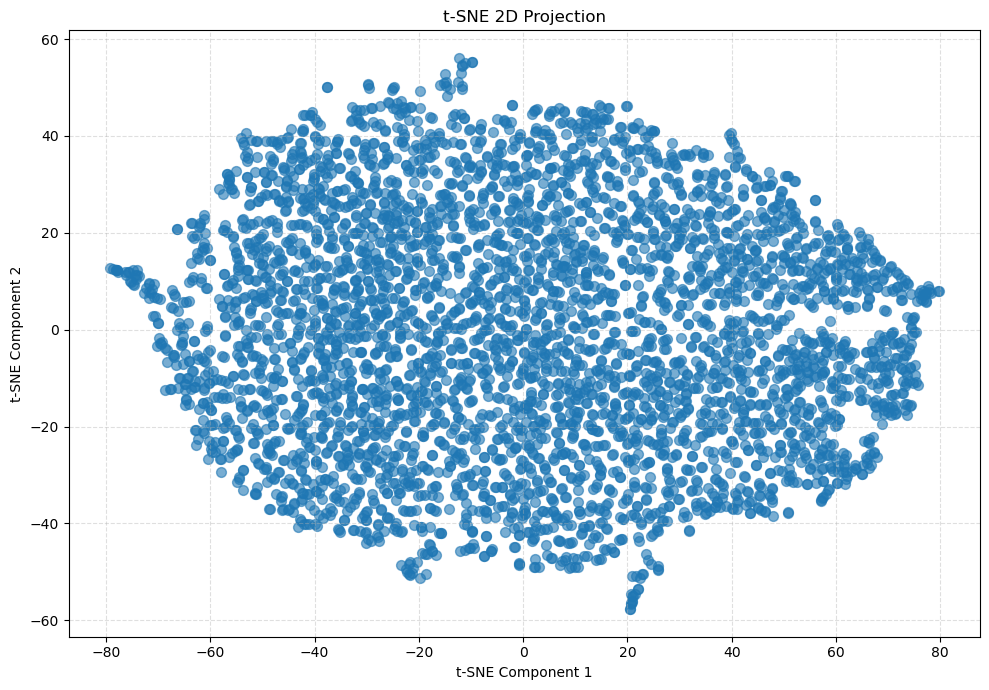

In [27]:
# 2D t-SNE visualization
plt.figure(figsize=(10, 7))
plt.scatter(tsne_scores_2d[:, 0], tsne_scores_2d[:, 1], alpha=0.6, s=50)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE 2D Projection')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### 05. Apply t-SNE for higher dimensions (for clustering)


In [28]:
# t-SNE for 3D visualization
tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000, verbose=1)
tsne_scores_3d = tsne_3d.fit_transform(X_tsne)
print(f"t-SNE 3D embedding shape: {tsne_scores_3d.shape}")


c:\Users\www\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4385 samples in 0.002s...
[t-SNE] Computed neighbors for 4385 samples in 0.220s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4385
[t-SNE] Computed conditional probabilities for sample 2000 / 4385
[t-SNE] Computed conditional probabilities for sample 3000 / 4385
[t-SNE] Computed conditional probabilities for sample 4000 / 4385
[t-SNE] Computed conditional probabilities for sample 4385 / 4385
[t-SNE] Mean sigma: 0.989143
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.592957
[t-SNE] KL divergence after 1000 iterations: 2.281791
t-SNE 3D embedding shape: (4385, 3)


### 06. Visualize t-SNE 3D projection


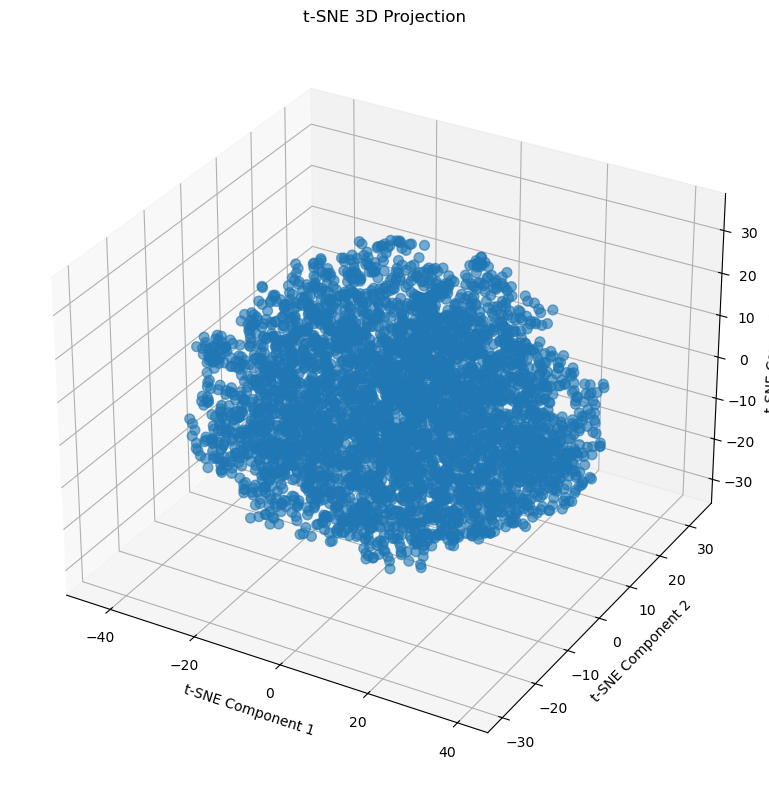

In [29]:
# Optional: 3D visualization
  # noqa: F401

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_scores_3d[:, 0], tsne_scores_3d[:, 1], tsne_scores_3d[:, 2], s=50, alpha=0.6)
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('t-SNE 3D Projection')
plt.tight_layout()
plt.show()


### 08. Saving Dataset


In [30]:
n_components_to_save = 3

tsne_top = pd.DataFrame(
    tsne_scores_3d[:, :n_components_to_save],
    columns=[f'PC{i+1}' for i in range(n_components_to_save)]
)

output_path = '../data/TSNE_components.csv'
tsne_top.to_csv(output_path, index=False)
print("Saved TSNE components successfully!")

Saved TSNE components successfully!


In [31]:
tsne_top.head()


,PC1,PC2,PC3
0,-14.711916,11.745303,20.229321
1,-32.228271,-9.460072,10.497274
2,-14.652037,-18.224024,-17.449625
3,16.355503,20.072386,4.904910
4,25.285778,0.121993,17.794727
